# Hypothesis Testing

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### Has the network latency gone up since we switched internet service providers?

Null hypothesis: Internet service provider does not affect network latency

Alternative hypothesis: Our new internet is giving me lag! T_T

True positive: Network latency going up is due to a difference in service providers

True negative: Our network latency is due to factors outside of our choice of service provider

Type I error: I knew we shouldn't have switched our ISP! Now we're lagging! #But it's not the ISP, bruh

Type II error: No, just got off the phone with our ISP. They're saying we're good. #BUT IT IS THE ISP BRUH


### Is the website redesign any good?

Null hypothesis: The new design of the website doesn't affect web performance

Alternative hypothesis: Our redo is killin' it!

True positive: The new design of the website positively impacts web performance

True negative: Our new web design does not affect web performance

Type I error: Web performance is awesome thanks to the website design team! #but good web performance is due to other factors

Type II error: Our web performance went up due to other factors. #But it was really the outstanding new design

### Is our television ad driving more sales?

Null hypothesis: Our television ad does not affect our sales

Alternative hypothesis: Our ad is pulling the cash in!

True positive: Our increased sales are driven by our advertisement

True negative: Our increases sales are due to other factors

Type I error: Look at all these profits thanks to the new ad! 
#But I told my fanbase about the product a month ago, and they been mad posting with the product for 2 weeks-- long before the ad

Type II error: Our sales are just going up, I can't find enough evidence to say our ad affects sales. 
#But no one knew about our product before the ad boiiiiiiiiiiiiii

# T-Test Exercises

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from pydataset import data
import mason_functions as mf

### Exercise 1
Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
#null hypothesis: The office_location selling the homes does not have an effect on the time it takes to sell homes
#alternate hypothesis: The different offices do sell homes at different rates

In [3]:
α = .05
μ1 = 90
σ1 = 15
μ2 = 100
σ2 = 20
office_1 = np.random.normal(μ1, σ1, 40)
office_2 = np.random.normal(μ2, σ2, 50)

In [4]:
office_1.var(), office_2.var() 

(261.4681597105976, 336.46339949332673)

In [5]:
office_2.var() / office_1.var()
#variance ratio is less than 4, but

1.286823603553628

In [6]:
stats.levene(office_2, office_1)
#low p-value indicates different variances (p < .05)

LeveneResult(statistic=1.576250012188015, pvalue=0.21262518562775481)

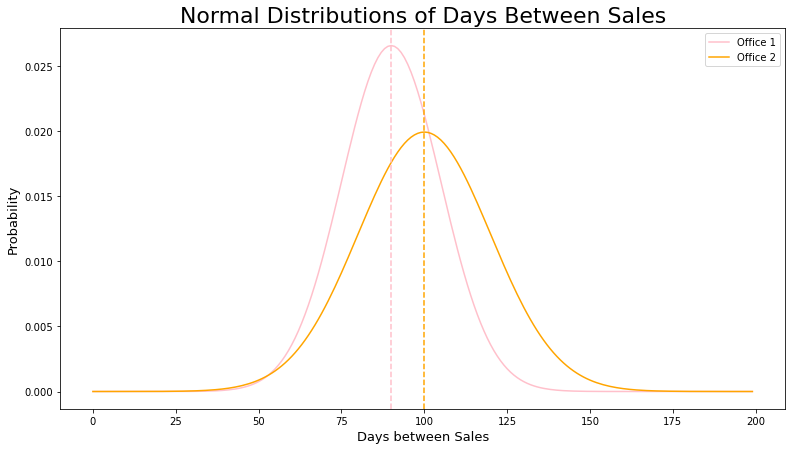

In [7]:

x = np.arange(0, 200)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)

plt.figure(figsize = (13, 7))
plt.plot(x, y1, label = 'Office 1', color = 'pink')
plt.plot(x, y2, label = 'Office 2', color = 'orange')
plt.axvline(90, ls = '--', color = 'pink')
plt.axvline(100, ls = '--', color = 'orange')
plt.title('Normal Distributions of Days Between Sales', size = 22)
plt.xlabel('Days between Sales', size = 13)
plt.ylabel('Probability', size = 13)
plt.legend();

In [8]:
#tentative
t, p = stats.ttest_ind(office_1, office_2, equal_var = False)
t, p, α

(-2.5735201561209973, 0.011758460341188862, 0.05)

In [9]:
if p < α:
    print('REJECTED: Null hypothesis')
else:
    print('Failed to reject: Null hypothesis')

REJECTED: Null hypothesis


In [10]:
#fsho
t, p = stats.ttest_ind_from_stats(μ1, σ1, 40, μ2, σ2, 50)
t, p, α

(-2.6252287036468456, 0.01020985244923939, 0.05)

In [11]:
if p < α:
    print('REJECTED: Null hypothesis')
else:
    print('Failed to reject: Null hypothesis')

REJECTED: Null hypothesis


In [12]:
#Different offices sell homes at different rates

### Exercise 2
#### Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Are compact cars more fuel-efficient than the average car?

Do manual cars get better gas mileage than automatic cars?

#### A. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [13]:
mpg = data('mpg')

In [14]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [15]:
mpg['average_mileage'] = mpg[['cty', 'hwy']].mean(axis = 1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [16]:
models_2008 = mpg[mpg.year == 2008]
models_1999 = mpg[mpg.year == 1999]
models_1999.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0


In [17]:
models_2008.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0
11,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact,23.0


In [18]:
#null hypothesis: There is no difference in fuel efficiency.
#alternate hypothesis: The year of manufacture does affect the fuel efficiency of the car

Text(0.5, 1.0, '1999 Avg. Mpg')

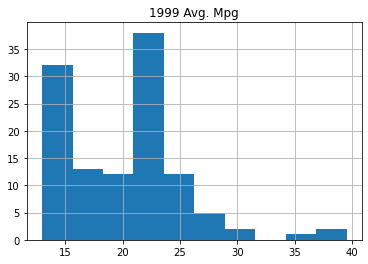

In [19]:
models_1999.average_mileage.hist()
plt.title('1999 Avg. Mpg')

Text(0.5, 1.0, '2008 Avg. Mpg')

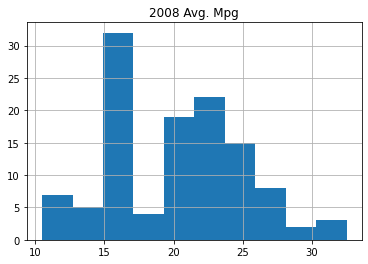

In [20]:
models_2008.average_mileage.hist()
plt.title('2008 Avg. Mpg')

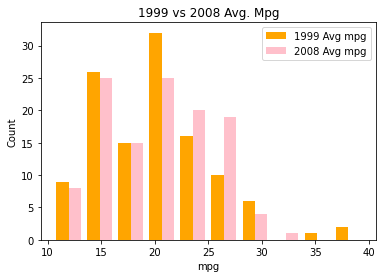

In [21]:
plt.hist([models_1999.average_mileage, models_2008.average_mileage], 
        label = ['1999 Avg mpg', '2008 Avg mpg'], 
        color = ['orange', 'pink'])
plt.title('1999 vs 2008 Avg. Mpg')
plt.xlabel('mpg')
plt.ylabel('Count')
plt.legend();

In [22]:
α = .05
models_1999.average_mileage.var(), models_2008.average_mileage.var()
#variance ratio is less than 4

(27.122605363984682, 24.097480106100797)

In [23]:
stats.levene(models_1999.average_mileage, models_2008.average_mileage)
#high p-value indicates equal variances

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

In [24]:
t, p = stats.ttest_ind(models_2008.average_mileage, models_1999.average_mileage)
t, p, α

(-0.21960177245940962, 0.8263744040323578, 0.05)

In [25]:
if p < α:
    print('REJECTED: Null hypothesis')
else:
    print('Failed to reject: Null hypothesis')

Failed to reject: Null hypothesis


In [26]:
#There is no difference in fuel efficiency between 2008 cars and 1999 cars

#### B. Are compact cars more fuel-efficient than the average car?

In [27]:
#null hypothesis: compact cars have the same or less fuel efficiency as the average car
#alternate hypothesis: compact cars are more fuel-efficient than the average car
α = .05
compact_cars = mpg[mpg['class'] == 'compact']
mpg.average_mileage.mean()

20.14957264957265

<AxesSubplot:>

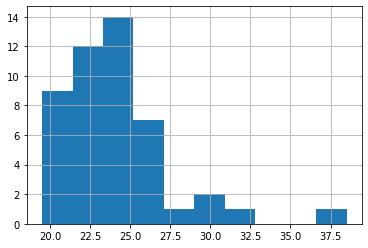

In [28]:
compact_cars.average_mileage.hist()

<AxesSubplot:>

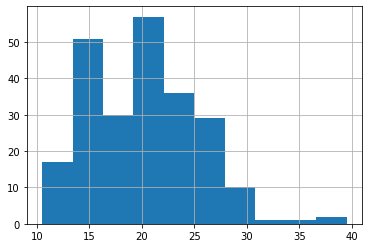

In [29]:
mpg.average_mileage.hist()

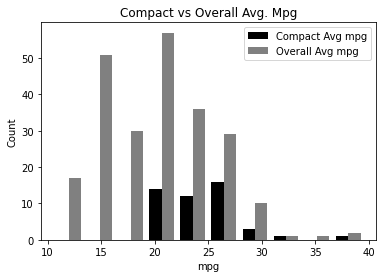

In [30]:
plt.hist([compact_cars.average_mileage, mpg.average_mileage], 
        label = ['Compact Avg mpg', 'Overall Avg mpg'], 
        color = ['black', 'gray'])
plt.legend()
plt.title('Compact vs Overall Avg. Mpg')
plt.xlabel('mpg')
plt.ylabel('Count');

In [31]:
t, p = stats.ttest_1samp(compact_cars.average_mileage, mpg.average_mileage.mean())
t, p/2, α

(7.896888573132535, 2.0992818971585668e-10, 0.05)

In [32]:
if (p/2 < α) & (t > 0):
    print('REJECTED: Null hypothesis')
else:
    print('Failed to reject: Null hypothesis')

REJECTED: Null hypothesis


#### C. Do manual cars get better gas mileage than automatic cars?

In [33]:
#null hypothesis: manual cars have the same or less gas mileage than automatic cars
#alternate hypothesis: manual cars have better gas mileage than automatic cars
α = .05
manual_average = mpg[mpg.trans.str.contains('manual')].average_mileage
auto_average = mpg[mpg.trans.str.contains('auto')].average_mileage
manual_average.var(), auto_average.var()
#variances are roughly the same

(26.635167464114826, 21.942777233382337)

In [34]:
stats.levene(manual_average, auto_average)
#high p-value indicates equal variances

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

<AxesSubplot:>

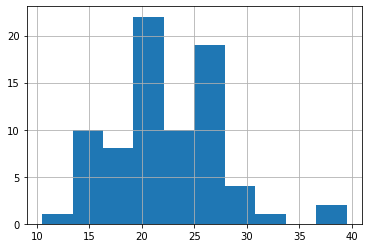

In [35]:
manual_average.hist()

<AxesSubplot:>

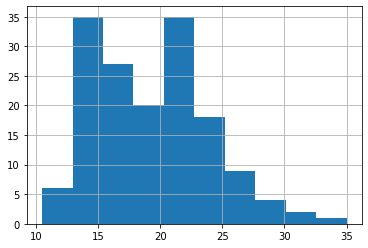

In [36]:
auto_average.hist()

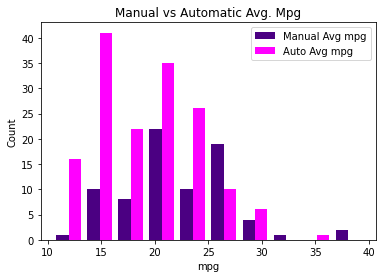

In [37]:
plt.hist([manual_average, auto_average],
        label = ['Manual Avg mpg', 'Auto Avg mpg'],
        color = ['indigo', 'magenta'])
plt.title('Manual vs Automatic Avg. Mpg')
plt.xlabel('mpg')
plt.ylabel('Count')
plt.legend();

In [38]:
t, p = stats.ttest_ind(manual_average, auto_average)
t, p/2, α

(4.593437735750014, 3.5771872005728416e-06, 0.05)

In [39]:
if (p/2 < α) & (t > 0):
    print('REJECTED: Null hypothesis')
else:
    print('Failed to reject: Null hypothesis')

REJECTED: Null hypothesis


# Correlation Exercises

### Exercise 1 
Use the telco_churn data. 

Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [40]:
telco_churn = pd.read_csv('telco_churn.csv')

In [41]:
telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Does tenure correlate with monthly charges?

In [42]:
#null hypothesis: there is no correlation between tenure and monthly charges
#alternate hypothesis: tenure correlates with monthly charges
confidence_level = .95
α = 1 - confidence_level

In [43]:
telco_churn.info(), telco_churn.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(None,
        SeniorCitizen       tenure  MonthlyCharges
 count    7043.000000  7043.000000     7043.000000
 mean        0.162147    32.371149       64.761692
 std         0.368612    24.559481       30.090047
 min         0.000000     0.000000       18.250000
 25%         0.000000     9.000000       35.500000
 50%         0.000000    29.000000       70.350000
 75%         0.000000    55.000000       89.850000
 max         1.000000    72.000000      118.750000)

In [44]:
corr, p = stats.pearsonr(telco_churn.tenure, telco_churn.MonthlyCharges)
corr, p
#

(0.2478998562861525, 4.094044991483017e-99)

In [45]:
if p < α:
    print('REJECTED: Null hypothesis')
else:
    print('Failed to reject: Null hypothesis')

REJECTED: Null hypothesis


#### Does tenure correlate with total charges?

In [46]:
#Null hypothesis: There is no correlation between tenure and total charges
#Alternate hypothesis: Tenure and total charges correlate

In [47]:
telco_churn.TotalCharges = telco_churn.TotalCharges.str.strip()
telco_churn = telco_churn[telco_churn.TotalCharges != '']
telco_churn.TotalCharges = telco_churn.TotalCharges.astype(float)

In [48]:
telco_churn.TotalCharges.dtype

dtype('float64')

In [49]:
corr, p = stats.pearsonr(telco_churn.TotalCharges, telco_churn.tenure)
corr, p

(0.8258804609332093, 0.0)

In [50]:
if p < α:
    print('REJECTED: Null hypothesis')
else:
    print('Failed to reject: Null hypothesis')

REJECTED: Null hypothesis


#### What happens if you control for phone and internet service?

In [51]:
#has phone service monthly
#has_phone_service = telco_churn[telco_churn.PhoneService == 'Yes']
#corr, p = stats.pearsonr(has_phone_service.tenure, has_phone_service.MonthlyCharges)
#corr, p
#no_phone_service = telco_churn[telco_churn.PhoneService == 'No']
#DSL_service = telco_churn[telco_churn.InternetService == 'DSL']
#fiber_service = telco_churn[telco_churn.InternetService == 'Fiber optic']
#no phone service monthly
#corr, p = stats.pearsonr(no_phone_service.tenure, no_phone_service.MonthlyCharges)
#corr, p
#DSL service monthly
#corr, p = stats.pearsonr(DSL_service.tenure, DSL_service.MonthlyCharges)
#corr, p
#Fiber optic service monthly
#corr, p = stats.pearsonr(fiber_service.tenure, fiber_service.MonthlyCharges)
#corr, p
#whoa
#phone service and total charges
#corr, p = stats.pearsonr(has_phone_service.tenure, has_phone_service.TotalCharges)
#corr, p
#no phone service and total charges
#corr, p = stats.pearsonr(no_phone_service.tenure, no_phone_service.TotalCharges)
#corr, p
#DSL service and total charges
#corr, p = stats.pearsonr(DSL_service.tenure, DSL_service.TotalCharges)
#corr, p
#Fiber optic service and total charges
#corr, p = stats.pearsonr(fiber_service.tenure, fiber_service.TotalCharges)
#corr, p

In [52]:
telco_churn['phone_service_type'] = telco_churn['MultipleLines'].str.replace('No', 'One line').str.replace('Yes', 'Two or more lines').str.replace('One line phone service', 'No phone service')
telco_churn.phone_service_type.value_counts()

One line             3385
Two or more lines    2967
No phone service      680
Name: phone_service_type, dtype: int64

In [53]:
telco_churn['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [54]:
telco_churn['InternetService'] = telco_churn['InternetService'].str.replace('No', 'No internet service')

In [55]:
telco_churn['telco_subscription'] = telco_churn.InternetService + '/ ' + telco_churn.phone_service_type
telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,phone_service_type,telco_subscription
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,DSL/ No phone service
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,One line,DSL/ One line
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,One line,DSL/ One line
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,DSL/ No phone service
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,One line,Fiber optic/ One line


In [56]:
telco_churn.telco_subscription.value_counts()

Fiber optic/ Two or more lines            1938
No internet service/ One line             1180
Fiber optic/ One line                     1158
DSL/ One line                             1047
DSL/ Two or more lines                     689
DSL/ No phone service                      680
No internet service/ Two or more lines     340
Name: telco_subscription, dtype: int64

In [57]:
#Thank you
def correlation_test(x, y):
    message = ''
    corr, p = stats.pearsonr(x, y)
    
    if p < α:
        message = 'Rejected the null hypothesis that there is no linear correlation. Evidence supports a linear correlation.'
    else:
        message = 'Failed to reject the null hypothesis that there is no linear correlation. Insufficient evidence to support a linear correlation.'
    
    return corr, p, message

In [58]:
subscription_types = telco_churn['telco_subscription'].value_counts().index
subscription_types

Index(['Fiber optic/ Two or more lines', 'No internet service/ One line',
       'Fiber optic/ One line', 'DSL/ One line', 'DSL/ Two or more lines',
       'DSL/ No phone service', 'No internet service/ Two or more lines'],
      dtype='object')

In [59]:
#Thank you for this beautiful code, Ryan Orsinger
output_list = []
for subscription in subscription_types:
    subset = telco_churn[telco_churn.telco_subscription == subscription]
    corr, p, message = correlation_test(subset.tenure, subset.MonthlyCharges)
    resulting_dictionary = {
        'Subscription': subscription,
        'Correlation coefficient': corr,
        'P-value': p,
        'Outcome': message
    }
    output_list.append(resulting_dictionary)

print('Correlation test results for tenure vs. monthly charges, controlling for Internet/ Phone service')
print('------------------------------------------------------------------------------------------------')
pd.DataFrame(output_list)

Correlation test results for tenure vs. monthly charges, controlling for Internet/ Phone service
------------------------------------------------------------------------------------------------


,Subscription,Correlation coefficient,P-value,Outcome
0,Fiber optic/ Two or more lines,0.573212,1.083568e-169,Rejected the null hypothesis that there is no linear correlation. Evidence supports a ...
1,No internet service/ One line,-0.012140,6.769684e-01,Failed to reject the null hypothesis that there is no linear correlation. Insufficient...
2,Fiber optic/ One line,0.528906,1.881036e-84,Rejected the null hypothesis that there is no linear correlation. Evidence supports a ...
3,DSL/ One line,0.562023,3.174262e-88,Rejected the null hypothesis that there is no linear correlation. Evidence supports a ...
4,DSL/ Two or more lines,0.609170,3.258127e-71,Rejected the null hypothesis that there is no linear correlation. Evidence supports a ...
5,DSL/ No phone service,0.592430,1.173274e-65,Rejected the null hypothesis that there is no linear correlation. Evidence supports a ...
6,No internet service/ Two or more lines,-0.033216,5.416047e-01,Failed to reject the null hypothesis that there is no linear correlation. Insufficient...


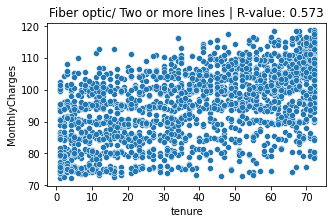

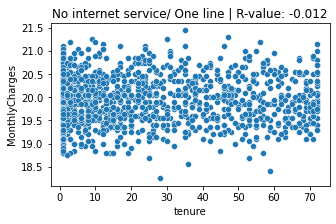

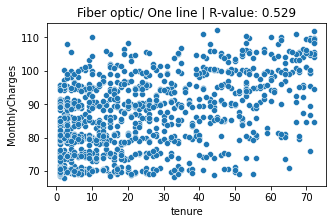

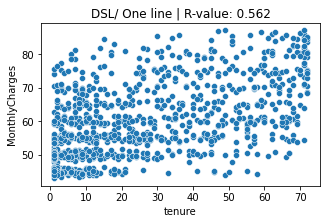

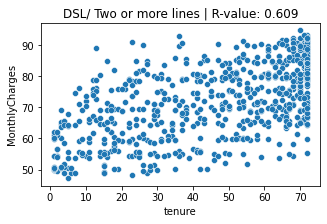

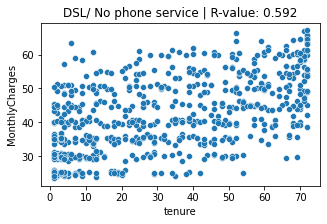

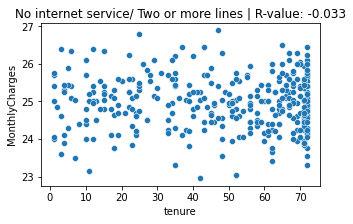

In [60]:
for subscription in subscription_types:
    subset = telco_churn[telco_churn.telco_subscription == subscription]
    corr, p, message = correlation_test(subset.tenure, subset.MonthlyCharges)
    resulting_dictionary = {
        'Subscription': subscription,
        'Correlation coefficient': corr,
        'P-value': p,
        'Outcome': message
    }
    plt.figure(figsize = (5, 3))
    plt.title(f'{subscription} | R-value: {round(resulting_dictionary["Correlation coefficient"], 3)}')
    sn.scatterplot(x = 'tenure', y = 'MonthlyCharges', data = subset)

In [61]:
output_list = []
for subscription in subscription_types:
    subset = telco_churn[telco_churn.telco_subscription == subscription]
    corr, p, message = correlation_test(subset.tenure, subset.TotalCharges)
    resulting_dictionary = {
        'Subscription': subscription,
        'Correlation coefficient': corr,
        'P-value': p,
        'Outcome': message
    }
    output_list.append(resulting_dictionary)

print('Correlation test results for tenure vs. total charges, controlling for Internet/ Phone service')
print('----------------------------------------------------------------------------------------------')
pd.DataFrame(output_list)

Correlation test results for tenure vs. total charges, controlling for Internet/ Phone service
----------------------------------------------------------------------------------------------


,Subscription,Correlation coefficient,P-value,Outcome
0,Fiber optic/ Two or more lines,0.983112,0.0,Rejected the null hypothesis that there is no linear correlation. Evidence supports a ...
1,No internet service/ One line,0.996779,0.0,Rejected the null hypothesis that there is no linear correlation. Evidence supports a ...
2,Fiber optic/ One line,0.986829,0.0,Rejected the null hypothesis that there is no linear correlation. Evidence supports a ...
3,DSL/ One line,0.973611,0.0,Rejected the null hypothesis that there is no linear correlation. Evidence supports a ...
4,DSL/ Two or more lines,0.965781,0.0,Rejected the null hypothesis that there is no linear correlation. Evidence supports a ...
5,DSL/ No phone service,0.953423,0.0,Rejected the null hypothesis that there is no linear correlation. Evidence supports a ...
6,No internet service/ Two or more lines,0.994139,0.0,Rejected the null hypothesis that there is no linear correlation. Evidence supports a ...


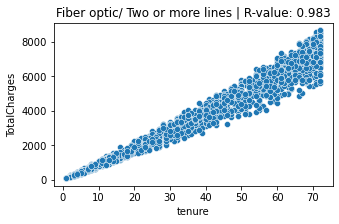

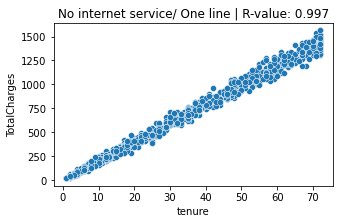

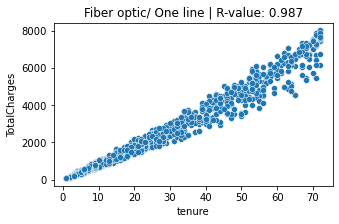

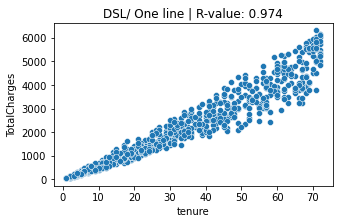

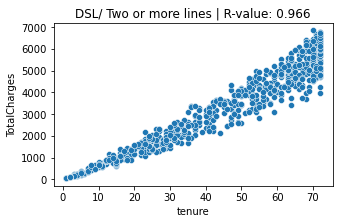

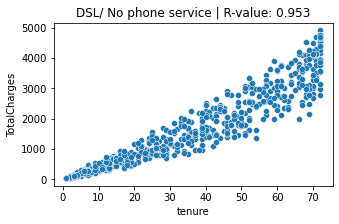

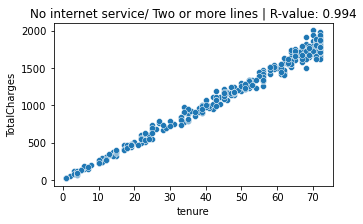

In [62]:
for subscription in subscription_types:
    subset = telco_churn[telco_churn.telco_subscription == subscription]
    corr, p = stats.pearsonr(subset.tenure, subset.TotalCharges)
    plt.figure(figsize = (5, 3))
    plt.title(f'{subscription} | R-value: {round(corr, 3)}')
    sn.scatterplot(x = 'tenure', y = 'TotalCharges', data = subset)

### Exercise 2

Use the employees database.

Is there a relationship between how long an employee has been with the company and their salary?

Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [63]:
def get_db_url(db_name):
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

#### Is there a relationship between how long an employee has been with the company and their salary?

In [64]:
#Null hypothesis: There is no linear correlation between how long an employee has been with the company and their salary
#Alternate hypthesis: How long an employee has been with a company is linearly correlated with their salary.

In [65]:
sql = """
SELECT DATEDIFF(NOW(), hire_date) as days_with_co, salary
FROM employees 
JOIN salaries USING(emp_no)
WHERE salaries.to_date > NOW()
"""
url = get_db_url('employees')
df = pd.read_sql(sql, url)

In [66]:
df.sample(5)

,days_with_co,salary
101354,12681,68858
29055,12872,86106
33630,13145,79833
81500,13269,82779
159473,13309,81723


In [67]:
correlation_test(df.days_with_co, df.salary)

(0.30646256131860894,
 0.0,
 'Rejected the null hypothesis that there is no linear correlation. Evidence supports a linear correlation.')

Text(0.5, 1.0, 'Tenure vs Salary | R-value: 0.9941386293276852')

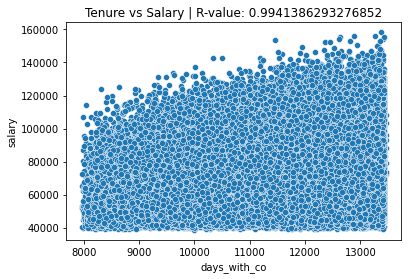

In [68]:
sn.scatterplot(x = 'days_with_co', y = 'salary', data = df)
plt.title(f'Tenure vs Salary | R-value: {corr}')

#### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [69]:
#Null hypothesis: There is no linear relationship between how long an employee has been with the company and how many titles they've had.
#Alternate hypothesis: Number of titles and time with company are linearly correlated.

In [70]:
sql = '''
SELECT COUNT(title), DATEDIFF(NOW(), hire_date) as days_with_co, emp_no
FROM employees
JOIN titles USING(emp_no)
GROUP BY emp_no
'''
url = get_db_url('employees')
count_titles_df = pd.read_sql(sql, url)

In [71]:
count_titles_df.sample(7)
count_titles_df.shape

(300024, 3)

In [72]:
count_titles_df['title_count'] = count_titles_df['COUNT(title)']

In [73]:
corr, p, message = correlation_test(count_titles_df.title_count, count_titles_df.days_with_co)
corr, p, message

(0.2665989299136427,
 0.0,
 'Rejected the null hypothesis that there is no linear correlation. Evidence supports a linear correlation.')

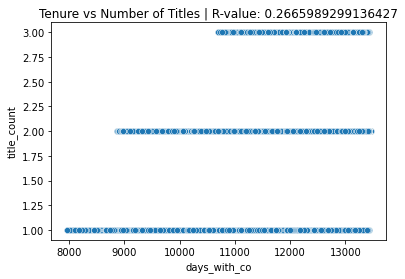

In [74]:
sn.scatterplot(x = 'days_with_co', y = 'title_count', data = count_titles_df)
plt.title(f'Tenure vs Number of Titles | R-value: {corr}');

### Exercise 3
Use the sleepstudy data. 

Is there a relationship between days and reaction time?

In [75]:
sleepy = data('sleepstudy')
sleepy.sample(8)

,Reaction,Days,Subject
99,455.8643,8,337
161,269.8804,0,371
116,329.7247,5,350
95,365.7324,4,337
124,280.5891,3,351
12,205.2658,1,309
21,199.0539,0,310
179,369.1417,8,372


In [76]:
#Null hypothesis: There is no linear correlation between days and reaction time.
#Alternate hypothesis: Days and reaction time are linearly correlated.

In [77]:
corr, p, message = correlation_test(sleepy.Days, sleepy.Reaction)
corr, p, message

(0.5352302262650253,
 9.894096322214812e-15,
 'Rejected the null hypothesis that there is no linear correlation. Evidence supports a linear correlation.')

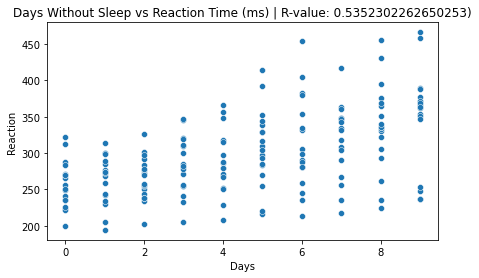

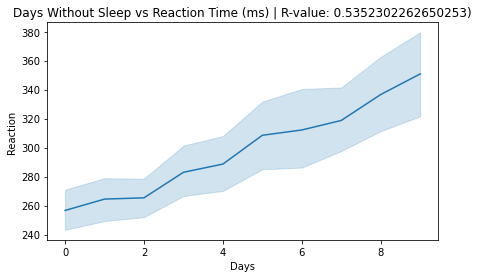

In [78]:
plt.figure(figsize = (7, 4))
sn.scatterplot(x = 'Days', y = 'Reaction', data = sleepy)
plt.title(f'Days Without Sleep vs Reaction Time (ms) | R-value: {corr})')
plt.figure(figsize = (7, 4))
sn.lineplot(x = 'Days', y = 'Reaction', data = sleepy)
plt.title(f'Days Without Sleep vs Reaction Time (ms) | R-value: {corr})');

# Chi $^2$ Test Exercises

### Exercise 1

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 	Codeup Student	Not Codeup Student
Uses a Macbook	49	20
Doesn't Use A Macbook	1	30

In [79]:
#Null hypothesis: Using a macbook and being a Codeup student are indepent of each other
#Alternate hypothesis: Having a macbook has something to do with being in Codeup
α = .05

In [80]:
student = ['codeup', 'not_codeup']
computer = ['macbook', 'not_a_mac']

codeup_table = pd.DataFrame([[49, 20], [1, 30]], index = computer, columns = student)
codeup_table

,codeup,not_codeup
macbook,49,20
not_a_mac,1,30


In [81]:
chi2, p, degf, expected = stats.chi2_contingency(codeup_table)
chi2, p, degf, expected.astype(int)

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34, 34],
        [15, 15]]))

In [82]:
if p < α:
    print('REJECTED: Null hypothesis')
else:
    print('Failed to reject: Null hypothesis')

REJECTED: Null hypothesis


### Exercise 2

Choose another 2 categorical variables from the mpg dataset and perform a chi$^2$
contingency table test with them. Be sure to state your null and alternative hypotheses.

In [83]:
mpg = data('mpg')
data('mpg', show_doc = True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [84]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [85]:
mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [86]:
manufacturers = mpg.manufacturer.value_counts()
manufacturers

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
subaru        14
hyundai       14
nissan        13
honda          9
jeep           8
pontiac        5
mercury        4
land rover     4
lincoln        3
Name: manufacturer, dtype: int64

In [87]:
classes = mpg['class'].value_counts()
classes

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [88]:
drives = mpg.drv.value_counts()
drives

f    106
4    103
r     25
Name: drv, dtype: int64

In [89]:
observed_1 = pd.crosstab(mpg.drv, mpg.manufacturer)
observed_1

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
drv,,,,,,,,,,,,,,,
4,11,4,26,13,0,0,8,4,0,4,4,0,14,15,0
f,7,5,11,0,9,14,0,0,0,0,9,5,0,19,27
r,0,10,0,12,0,0,0,0,3,0,0,0,0,0,0


In [90]:
observed_2 = pd.crosstab(mpg.drv, mpg.year)
observed_2

year,1999,2008
drv,,
4,49,54
f,57,49
r,11,14


In [91]:
#Null hypothesis: There is no association between the type of wheel-drive and the year of manufacture
#Alternate hypothesis: Year of manufacture and wheel-drive type are associated


chi2, p, degf, expected = stats.chi2_contingency(observed_2)
print('Observed\n')
print(observed_2.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 54]
 [57 49]
 [11 14]]
---
Expected

[[51 51]
 [53 53]
 [12 12]]
---

chi^2 = 1.2065
p     = 0.5470


In [92]:
if p < α:
    print('REJECTED: Null hypothesis')
else:
    print('Failed to reject: Null hypothesis')

Failed to reject: Null hypothesis


### Exercise 3

Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
Is an employee's gender independent of whether or not they are or have been a manager?

#### Is an employee's gender independent of whether an employee works in sales or marketing?

In [93]:
url = get_db_url('employees')
sql = """
SELECT dept_name, gender
FROM departments
JOIN dept_emp USING(dept_no)
JOIN employees USING(emp_no)
WHERE dept_emp.to_date > NOW()
"""
indepdent_query = pd.read_sql(sql, url)

In [94]:
indepdent_query

,dept_name,gender
0,Customer Service,M
1,Customer Service,F
2,Customer Service,M
3,Customer Service,F
4,Customer Service,F
...,...,...
240119,Sales,F
240120,Sales,M
240121,Sales,M
240122,Sales,F


In [95]:
employees_in_s_and_m = indepdent_query[(indepdent_query.dept_name == 'Sales') | (indepdent_query.dept_name == 'Marketing')]
employees_in_s_and_m

,dept_name,gender
104290,Marketing,F
104291,Marketing,M
104292,Marketing,F
104293,Marketing,F
104294,Marketing,F
...,...,...
240119,Sales,F
240120,Sales,M
240121,Sales,M
240122,Sales,F


In [96]:
employees_in_s_and_m.gender.value_counts()

M    31680
F    20863
Name: gender, dtype: int64

In [97]:
employees_in_s_and_m.dept_name.value_counts()

Sales        37701
Marketing    14842
Name: dept_name, dtype: int64

In [98]:
observed = pd.crosstab(employees_in_s_and_m.dept_name, employees_in_s_and_m.gender)

In [99]:
#Null hypothesis: Gender is independent of whether or not you work in sales or marketing
#Alternate hypothesis: Gender is associated with sales or marketing

chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed')
print('--------')
print(observed.values)
print('=================================')
print('Expected')
print('--------')
print(expected.astype(int))
print('=================================')
print('Chi^2 and P')
print('-----------')
print(f'chi^2 = {chi2:.4f}')
print(f'p = {p:.4f}')

Observed
--------
[[ 5864  8978]
 [14999 22702]]
Expected
--------
[[ 5893  8948]
 [14969 22731]]
Chi^2 and P
-----------
chi^2 = 0.3240
p = 0.5692


In [100]:
if p < α:
    print('REJECTED: Null hypothesis')
else:
    print('Failed to reject: Null hypothesis')

Failed to reject: Null hypothesis


#### Is an employee's gender independent of whether or not they are or have been a manager?

In [101]:
#Null hypothesis: Employee gender is independent of having been a manager.
#Alternate hypothesis: Gender and whether you've been a manager are not indepdent of each other.

In [102]:
sql = """
SELECT employees.emp_no, gender, dept_manager.dept_no
FROM employees
LEFT JOIN dept_manager USING(emp_no)
"""
managers = pd.read_sql(sql, url)

In [103]:
managers.sample(13)

,emp_no,gender,dept_no
298318,498294,M,None
121713,221689,F,None
80184,90185,M,None
141055,241031,M,None
194077,294053,F,None
247456,447432,F,None
170959,270935,M,None
223791,423767,F,None
263083,463059,M,None
106191,206167,F,None


In [104]:
managers['manager'] = managers['dept_no'].fillna(0)

In [105]:
managers.manager.value_counts()

0       300000
d006         4
d009         4
d004         4
d001         2
d002         2
d005         2
d003         2
d008         2
d007         2
Name: manager, dtype: int64

In [106]:
managers['manager'] = managers['manager'].apply(lambda binary: binary if binary == 0 else 1)

In [107]:
managers.manager.value_counts()

0    300000
1        24
Name: manager, dtype: int64

In [108]:
observed = pd.crosstab(managers.gender, managers.manager)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed')
print('--------')
print(observed.values)
print('=================================')
print('Expected')
print('--------')
print(expected.astype(int))
print('=================================')
print('Chi^2 and P')
print('-----------')
print(f'chi^2 = {chi2:.4f}')
print(f'p = {p:.4f}')

Observed
--------
[[120038     13]
 [179962     11]]
Expected
--------
[[120041      9]
 [179958     14]]
Chi^2 and P
-----------
chi^2 = 1.4567
p = 0.2275


In [109]:
if p < α:
    print('REJECTED: Null hypothesis')
else:
    print('Failed to reject: Null hypothesis')

Failed to reject: Null hypothesis
